# Preliminary

## Import Library

In [ ]:
# load data and process data
import numpy as np
import pandas as pd
import warnings
import json
import math
import joblib

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing & fe
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# mode selection and evaluation metrics
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    recall_score,
    precision_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer
)

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier
)
import xgboost as xgb
import lightgbm as lgb

# others
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

%matplotlib inline

# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
# define path data
path_data = '/content/drive/MyDrive/Dibimbing_DS/final_project_DS/dataset/processed/'


# load train_set
train_set_processed = joblib.load(path_data + 'train_set_processed.joblib')
train_set_processed_scaled = joblib.load(path_data + 'train_set_processed_scaled.joblib')

# load test_set
test_set_processed = joblib.load(path_data + 'test_set_processed.joblib')
test_set_processed_scaled = joblib.load(path_data + 'test_set_processed_scaled.joblib')

## Splitting Data

In [ ]:
# split target data
y_train = train_set_processed['bankrupt']
y_test = test_set_processed['bankrupt']


# split data no scaling
X_train = train_set_processed.drop(columns='bankrupt')
X_test = test_set_processed.drop(columns='bankrupt')

# split data scaling
X_train_scaled = train_set_processed_scaled.drop(columns='bankrupt')
X_test_scaled = test_set_processed_scaled.drop(columns='bankrupt')

## Understanding & Validation Data

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 318 to 665
Data columns (total 76 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   roa(c) before interest and depreciation before interest  5455 non-null   float64
 1   roa(a) before interest and % after tax                   5455 non-null   float64
 2   roa(b) before interest and depreciation after tax        5455 non-null   float64
 3   operating gross margin                                   5455 non-null   float64
 4   realized sales gross margin                              5455 non-null   float64
 5   operating profit rate                                    5455 non-null   float64
 6   pre-tax net interest rate                                5455 non-null   float64
 7   after-tax net interest rate                              5455 non-null   float64
 8   non-industry income and expendit

In [ ]:
X_train.head()

,roa(c) before interest and depreciation before interest,roa(a) before interest and % after tax,roa(b) before interest and depreciation after tax,operating gross margin,realized sales gross margin,operating profit rate,pre-tax net interest rate,after-tax net interest rate,non-industry income and expenditure/revenue,continuous interest rate (after tax),persistent eps in the last four seasons,operating profit per share (yuan ¥),per share net profit before tax (yuan ¥),operating profit/paid-in capital,net profit before tax/paid-in capital,operating profit per person,retained earnings to total assets,total income/total expense,net income to total assets,gross profit to sales,net income to stockholder's equity,cash flow rate,cash flow per share,current ratio,quick ratio,working capital to total assets,quick assets/total assets,current assets/total assets,cash/total assets,quick assets/current liability,cash flow to total assets,cash flow to liability,cfo to assets,cash flow to equity,current liability to current assets,total debt/total net worth,debt ratio %,net worth/assets,long-term fund suitability ratio (a),borrowing dependency,contingent liabilities/net worth,current liability to assets,current liabilities/liability,current liabilities/equity,current liability to liability,current liability to equity,equity to long-term liability,liability-assets flag,liability to equity,degree of financial leverage (dfl),interest coverage ratio (interest expense to ebit),equity to liability,revenue per share (yuan ¥),interest expense ratio,total asset turnover,net worth turnover rate (times),total expense/assets,working capitcal turnover rate,realized sales gross profit growth rate,operating profit growth rate,after-tax net profit growth rate,regular net profit growth rate,continuous net profit growth rate,net value growth rate,total asset return growth rate ratio,net value per share (b),net value per share (a),net value per share (c),cash reinvestment %,working capital/equity,tax rate (a),inventory and accounts receivable/net value,inventory/working capital,cash flow to sales,fixed assets to assets,no-credit interval
318,0.493784,0.550153,0.544622,0.598524,0.598524,0.998980,0.797443,0.809355,0.303595,0.781616,0.221424,0.097956,0.176998,0.097652,0.175145,0.392958,0.932937,0.002378,0.806631,0.598521,0.840649,0.466210,0.321214,0.011323,0.005382,0.788318,0.146419,0.291350,0.007823,0.005575,0.635412,0.455924,0.586432,0.313704,0.025832,0.002071,0.054479,0.945521,0.005227,0.369637,0.005780,0.048699,0.813360,0.327756,0.813360,0.327756,0.110933,0,0.276281,0.026814,0.565265,0.070742,0.030507,0.630702,0.142429,0.027419,0.012305,0.593944,0.022238,0.848256,0.690475,0.690475,0.221159,0.000456,0.264398,0.200919,0.200919,0.200919,0.380565,0.733835,0.196072,0.397851,0.277522,0.671568,0.452605,0.623661
5796,0.534393,0.590765,0.573425,0.599302,0.599173,0.999023,0.797454,0.809359,0.303524,0.781621,0.249031,0.135412,0.206749,0.135424,0.205822,0.424617,0.942162,0.002533,0.827723,0.599298,0.843248,0.465192,0.330268,0.011338,0.009921,0.853149,0.746200,0.800978,0.035033,0.010236,0.649119,0.460260,0.611292,0.315824,0.025795,0.010805,0.160474,0.839526,0.005774,0.375230,0.007560,0.132502,0.784949,0.333800,0.784949,0.333800,0.116740,0,0.282615,0.026852,0.565433,0.022433,0.138119,0.630861,0.389805,0.100806,0.017890,0.593943,0.022206,0.848220,0.689580,0.689580,0.217614,0.000470,0.264301,0.195946,0.195946,0.195946,0.383210,0.741153,0.255087,0.414694,0.277090,0.671574,0.147509,0.624307
4454,0.526398,0.586895,0.566519,0.606740,0.606740,0.999103,0.797606,0.809470,0.303622,0.781718,0.230689,0.110903,0.188898,0.110077,0.187218,0.400828,0.941995,0.002726,0.828627,0.606739,0.841982,0.470258,0.323477,0.017457,0.016431,0.835867,0.464273,0.473712,0.237578,0.016525,0.676644,0.472124,0.606997,0.318599,0.016805,0.002555,0.064456,0.935544,0.005515,0.369637,0.005366,0.051387,0.731949,0.327916,0.731949,0.327916,0.110933,0,0.276632,0.026791,0.565159,0.059856,0.023655,0.630613,0.122939,0.02

In [ ]:
y_train.value_counts()

,count
bankrupt,
0,5279
1,176


In [ ]:
y_test.value_counts()

,count
bankrupt,
0,1320
1,44


Berdasarkan dokumentasi memang fitur imbalnce di mana total y di data tanpa splitting ada 220. Hasil penjumlahan di set train dan test akan berjumlah 220. Jadii ni sudah tepat.

In [ ]:
# print the result
# check shape
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

# check shape data scale
print(f'Shape of X_train_scaled: {X_train_scaled.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test_scaled: {X_test_scaled.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (5455, 76)
Shape of y_train: (5455,)
Shape of X_test: (1364, 76)
Shape of y_test: (1364,)
Shape of X_train_scaled: (5455, 76)
Shape of y_train: (5455,)
Shape of X_test_scaled: (1364, 76)
Shape of y_test: (1364,)


Pada EDA juga ditemukan fitur-fitur yang tidak invalid atau tidak masuk secara nilai, langkah atau metode yang dilakukan pada proses EDA dan processing adalah menghapus fitur tersebut jika sudah terlalu rusak atau melakukan capping dengan persentil ke 99 di set train.

Maka dari itu, hasil preprocessing memberikan 76 fitur utnuk dimodelkan. Perlu dipahami juga bahwa fitur2 di atas memiliki multikolinearias. Mengingat banyaknya fitur dan waktu yang terbatas, pemilihan model akan diserahkan pada model terbaik yang akan dipilih.

Adapun, berdasarkan hasi eksplorasi dan penelitian terkait, setidaknya ada 7 variabel yang kemungkinan memiliki pengaruh terhadap kebangkrutan perusahaan, di antaranya

1. roa(a) before interest and % after tax (Profitabilitas)
2. net worth/assets (Struktur Modal / Solvabilitas)
3. working capital to total assets (Likuiditas)
4. cash flow rate (Arus Kas)
5. net income to stockholder's equity (ROE - Profitabilitas)
6. debt ratio % (Leverage)
7. total asset turnover (Efisiensi)

# Modelling

In [ ]:
# create function for modelling data without resample
def get_best_models_cv(X: pd.DataFrame, y: pd.Series, models: dict, sort_by: str, n_splits: int = 5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'])

    for name, model in models.items():
        accuracy_scores = []
        auc_scores = []
        recall_scores = []
        precision_scores = []
        f1_scores = []

        for train_index, val_index in skf.split(X, y):
            X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
            y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

            model.fit(X_train_fold, y_train_fold)
            y_pred = model.predict(X_val_fold)

            # to handle cases where the model fails predict_proba
            if hasattr(model, 'predict_proba'):
                try:
                    y_proba = model.predict_proba(X_val_fold)[:, 1]
                    auc_scores.append(roc_auc_score(y_val_fold, y_proba))
                except (ValueError, AttributeError):
                    auc_scores.append(0.0)
            else:
                auc_scores.append(0.0)

            accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
            recall_scores.append(recall_score(y_val_fold, y_pred))
            precision_scores.append(precision_score(y_val_fold, y_pred))
            f1_scores.append(f1_score(y_val_fold, y_pred))

        results.loc[len(results)] = [
            name,
            pd.Series(accuracy_scores).mean(),
            pd.Series(auc_scores).mean(),
            pd.Series(recall_scores).mean(),
            pd.Series(precision_scores).mean(),
            pd.Series(f1_scores).mean()
        ]

    return results.sort_values(by=sort_by, ascending=False).reset_index(drop=True)

Fungsi di atas (`get_best_models_cv`) untuk memodelkan data **tanpa melakukan resampling atau SMOTE**.

In [ ]:
# create function for modelling data with resample (SMOTE)
def get_best_models_cv_SMOTE(X: pd.DataFrame, y: pd.Series, models: dict, sort_by: str, n_splits: int = 5):
    smote = SMOTE(random_state=42)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = pd.DataFrame(columns=['Model', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'])

    for name, model in models.items():
        accuracy_scores = []
        auc_scores = []
        recall_scores = []
        precision_scores = []
        f1_scores = []

        for train_index, val_index in skf.split(X, y):
            X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
            y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

            # fit SMOTE on train set
            X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train_fold, y_train_fold)

            # fit mode
            model.fit(X_train_SMOTE, y_train_SMOTE)
            y_pred = model.predict(X_val_fold)

            # to handle cases where the model fails predict_proba
            if hasattr(model, 'predict_proba'):
                try:
                    y_proba = model.predict_proba(X_val_fold)[:, 1]
                    auc_scores.append(roc_auc_score(y_val_fold, y_proba))
                except (ValueError, AttributeError):
                    auc_scores.append(0.0)
            else:
                auc_scores.append(0.0)

            accuracy_scores.append(accuracy_score(y_val_fold, y_pred))
            recall_scores.append(recall_score(y_val_fold, y_pred))
            precision_scores.append(precision_score(y_val_fold, y_pred))
            f1_scores.append(f1_score(y_val_fold, y_pred))

        results.loc[len(results)] = [
            name,
            pd.Series(accuracy_scores).mean(),
            pd.Series(auc_scores).mean(),
            pd.Series(recall_scores).mean(),
            pd.Series(precision_scores).mean(),
            pd.Series(f1_scores).mean()
        ]

    return results.sort_values(by=sort_by, ascending=False).reset_index(drop=True)

Fungsi di atas (`get_best_models_cv_SMOTE`) untuk memodelkan data yang **melakukan resampling atau SMOTE.**

In [ ]:
# intialize model
models = {
    'gbc': GradientBoostingClassifier(random_state=42),
    'lightgbm': lgb.LGBMClassifier(random_state=42, verbose=-1, n_jobs=-1),
    'xgb': xgb.XGBClassifier(random_state=42, n_jobs=-1),
    'rf': RandomForestClassifier(random_state=42, n_jobs=-1),
    'et': ExtraTreesClassifier(random_state=42, n_jobs=-1),
    'dt': DecisionTreeClassifier(random_state=42),
    'knn': KNeighborsClassifier(n_jobs=-1),
    'ada': AdaBoostClassifier(random_state=42),
    'lr': LogisticRegression(random_state=42, solver='liblinear', n_jobs=-1),
    'svm': SVC(random_state=42, probability=True),
}

# Data without Scaled

## Compare Model

### Without Resamping

Metrik yang akan diperhatikan adalah F1 score karena data asli tidak seimbang. Masih terkati ketidakseimbangan data, n_split didefinisikan lebih besar dibandingkan default karena untuk memastikan hasil semakin kuat atau bukan merupakan sebuah kebetulan.

In [ ]:
experiment_with_data = get_best_models_cv(X_train,
                                          y_train,
                                          models,
                                          sort_by='F1',
                                          n_splits=10)

In [ ]:
experiment_with_data

,Model,Accuracy,AUC,Recall,Prec.,F1
0,gbc,0.966267,0.928829,0.244444,0.475253,0.309316
1,ada,0.964985,0.923048,0.245098,0.437637,0.308744
2,lightgbm,0.969569,0.935489,0.210784,0.651310,0.299875
3,xgb,0.967000,0.928585,0.216667,0.489990,0.284353
4,dt,0.947752,0.637829,0.306536,0.245223,0.271260
5,rf,0.969569,0.921049,0.159804,0.685357,0.247592
6,knn,0.969387,0.748035,0.148366,0.638333,0.234957
7,et,0.969752,0.930795,0.142157,0.603333,0.223220
8,lr,0.969754,0.916936,0.097059,0.680000,0.162856
9,svm,0.967737,0.880671,0.000000,0.000000,0.000000


### SMOTE

In [ ]:
experiment_with_data_SMOTE = get_best_models_cv_SMOTE(X_train,
                                                      y_train,
                                                      models,
                                                      sort_by='F1',
                                                      n_splits=10)

In [ ]:
experiment_with_data_SMOTE

,Model,Accuracy,AUC,Recall,Prec.,F1
0,et,0.957099,0.937329,0.529085,0.393066,0.439463
1,xgb,0.959117,0.925749,0.461438,0.391814,0.419515
2,lightgbm,0.955632,0.928449,0.500980,0.372211,0.418158
3,rf,0.949583,0.930447,0.489216,0.316975,0.380434
4,gbc,0.923920,0.918039,0.653595,0.244224,0.354378
5,ada,0.892939,0.922904,0.783660,0.202134,0.320598
6,lr,0.863052,0.926222,0.851961,0.174579,0.289121
7,knn,0.892751,0.835560,0.643464,0.180160,0.279902
8,dt,0.929602,0.683748,0.420915,0.207310,0.275572
9,svm,0.850774,0.925762,0.846732,0.161390,0.270503


### Comapre Result of Models

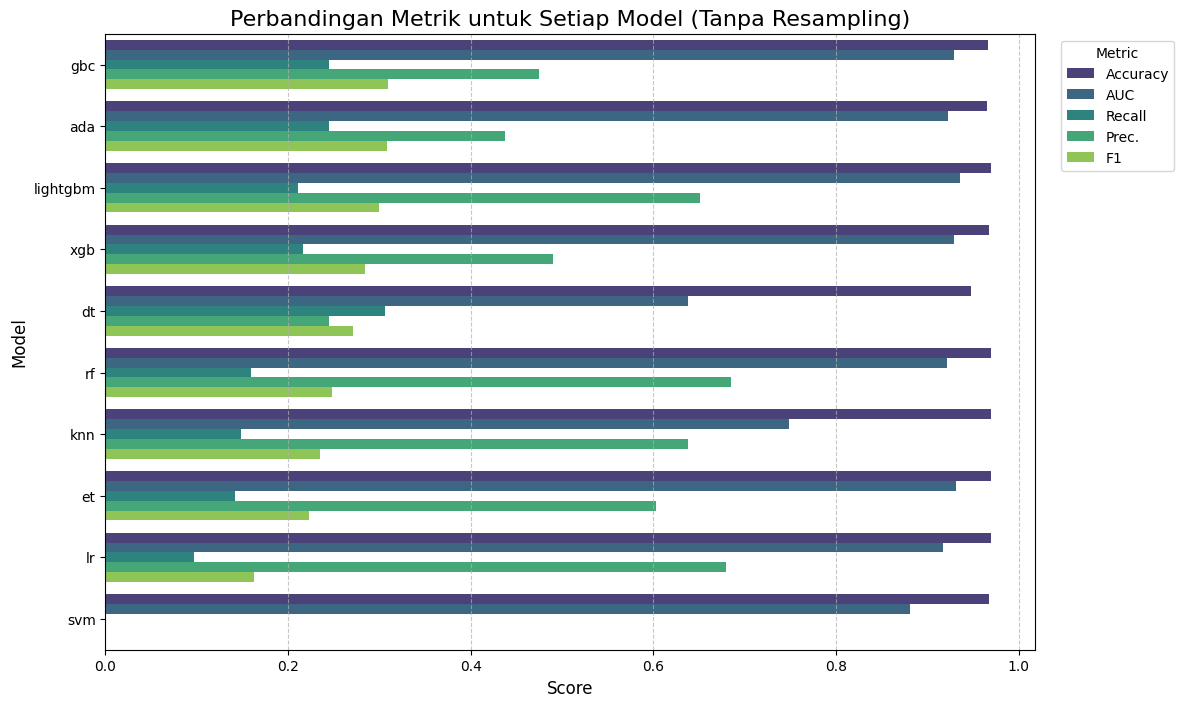

In [ ]:
# visualize result experiment in data no SMOTE
melted_results = pd.melt(experiment_with_data,
                         id_vars=['Model'],
                         value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'],
                         var_name='Metric',
                         value_name='Score')

# create stacked/group bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_results, y='Model', x='Score', hue='Metric', palette='viridis')
plt.title('Perbandingan Metrik untuk Setiap Model (Tanpa Resampling)', fontsize=16)

# labelling
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

# create legend
plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

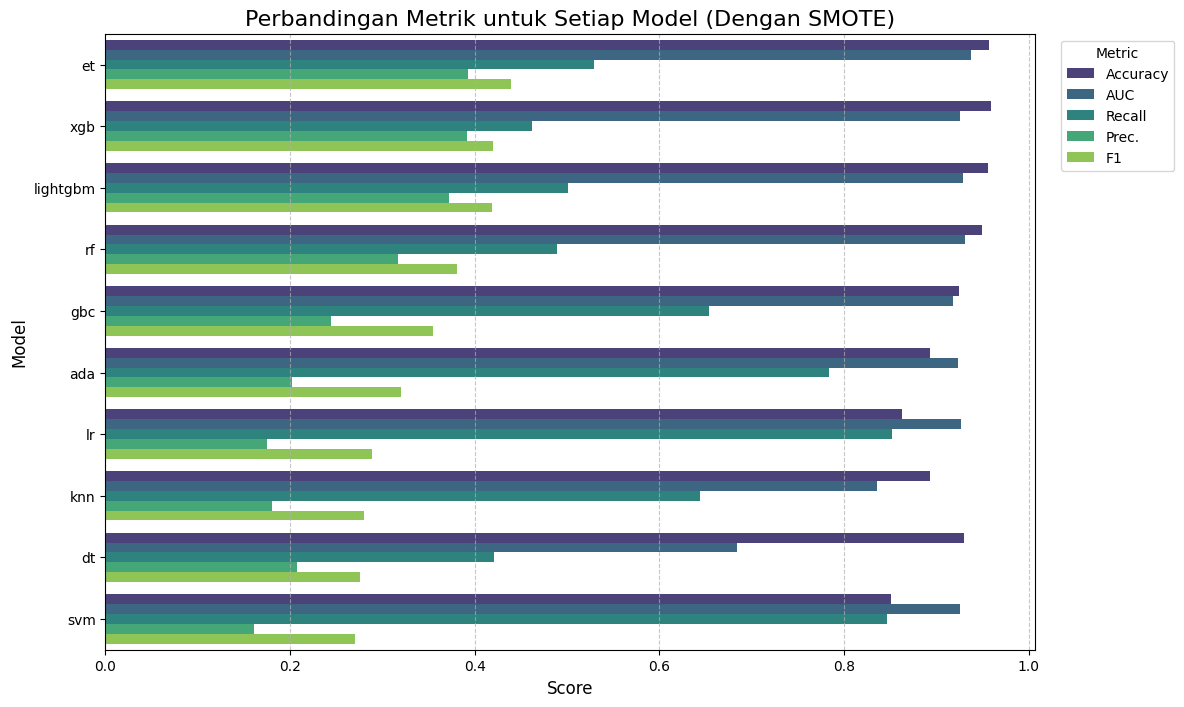

In [ ]:
# visualize result experiment in data no SMOTE
melted_results_SMOTE = pd.melt(experiment_with_data_SMOTE,
                         id_vars=['Model'],
                         value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'],
                         var_name='Metric',
                         value_name='Score')

# create stacked/group bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_results_SMOTE, y='Model', x='Score', hue='Metric', palette='viridis')
plt.title('Perbandingan Metrik untuk Setiap Model (Dengan SMOTE)', fontsize=16)

# labelling
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

# create legend
plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Data with Scaled

## FIt Model

### Without Resampling

In [ ]:
experiment_with_data_scaled = get_best_models_cv(X_train_scaled,
                                                 y_train,
                                                 models,
                                                 sort_by='F1',
                                                 n_splits=10)

In [ ]:
experiment_with_data_scaled

,Model,Accuracy,AUC,Recall,Prec.,F1
0,gbc,0.967550,0.931670,0.266993,0.503788,0.335229
1,ada,0.965169,0.922838,0.250980,0.444582,0.315513
2,lightgbm,0.969752,0.934406,0.210784,0.656746,0.304313
3,xgb,0.967916,0.928659,0.216013,0.557094,0.295519
4,lr,0.966452,0.892274,0.187908,0.477857,0.263503
5,dt,0.946284,0.628532,0.288889,0.232834,0.256636
6,rf,0.969569,0.920807,0.159804,0.685357,0.247592
7,et,0.969569,0.931212,0.142157,0.596190,0.222133
8,knn,0.966268,0.709480,0.079085,0.253333,0.119189
9,svm,0.967737,0.799860,0.000000,0.000000,0.000000


### SMOTE

In [ ]:
experiment_with_data_scaled_SMOTE = get_best_models_cv_SMOTE(X_train_scaled,
                                                             y_train,
                                                             models,
                                                             sort_by='F1',
                                                             n_splits=10)

In [ ]:
experiment_with_data_scaled_SMOTE

,Model,Accuracy,AUC,Recall,Prec.,F1
0,lightgbm,0.956364,0.929448,0.505882,0.374948,0.425143
1,et,0.954351,0.935104,0.524183,0.356080,0.419047
2,rf,0.950502,0.927888,0.478105,0.320026,0.380469
3,gbc,0.923184,0.920376,0.709477,0.254125,0.373273
4,xgb,0.955084,0.923577,0.415686,0.344635,0.372848
5,ada,0.883954,0.918148,0.783007,0.190572,0.305844
6,dt,0.931798,0.701308,0.454902,0.226841,0.299786
7,svm,0.862321,0.872119,0.743137,0.157472,0.259359
8,lr,0.834281,0.904070,0.863725,0.152429,0.257819
9,knn,0.879374,0.791156,0.551307,0.144597,0.228595


### Compare Result of Models

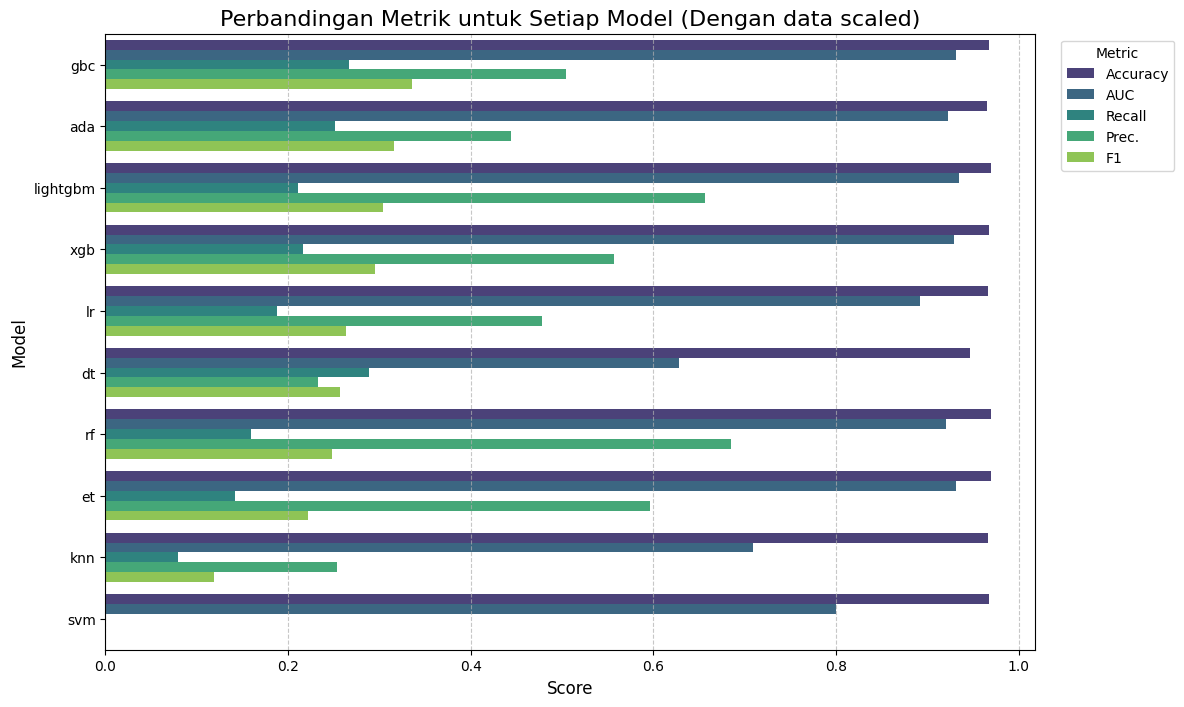

In [ ]:
# visualize result experiment in data scaled
melted_results_scaled = pd.melt(experiment_with_data_scaled,
                         id_vars=['Model'],
                         value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'],
                         var_name='Metric',
                         value_name='Score')

# create stacked/group bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_results_scaled, y='Model', x='Score', hue='Metric', palette='viridis')
plt.title('Perbandingan Metrik untuk Setiap Model (Dengan data scaled)', fontsize=16)

# labelling
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

# create legend
plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

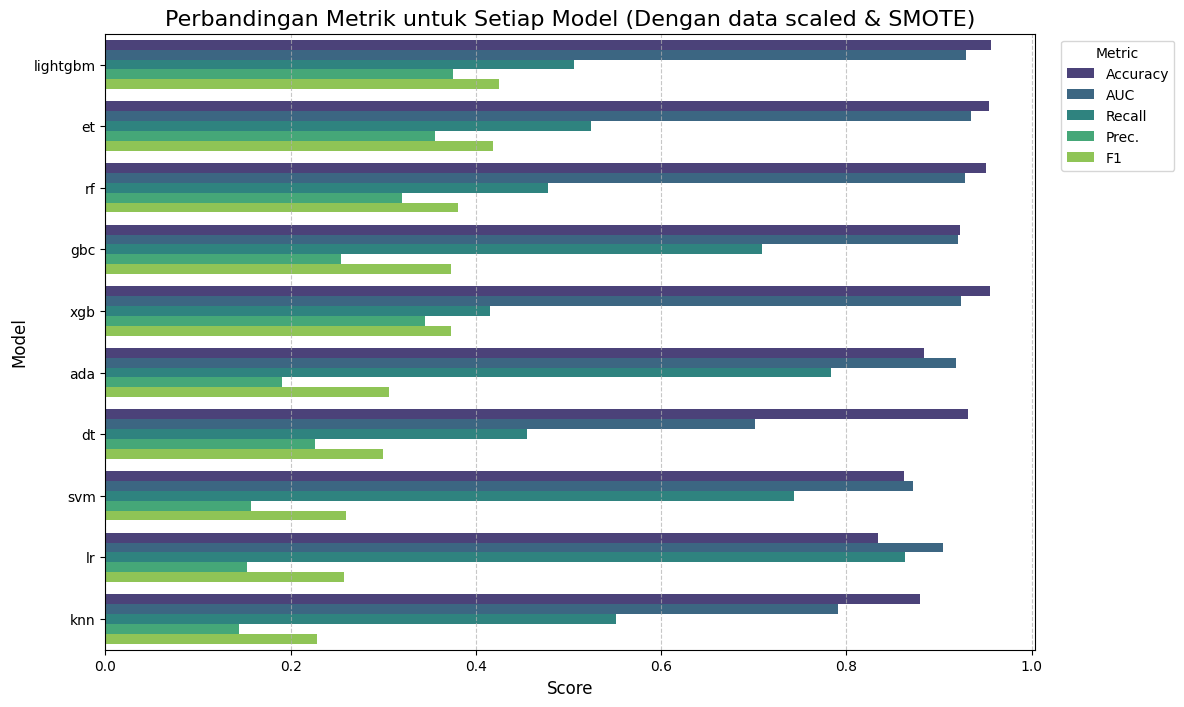

In [ ]:
# visualize result experiment in data scaled & SMOTE
melted_results_scaled_SMOTE = pd.melt(experiment_with_data_scaled_SMOTE,
                              id_vars=['Model'],
                              value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'],
                              var_name='Metric',
                              value_name='Score')

# create stacked/group bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_results_scaled_SMOTE, y='Model', x='Score', hue='Metric', palette='viridis')
plt.title('Perbandingan Metrik untuk Setiap Model (Dengan data scaled & SMOTE)', fontsize=16)

# labelling
plt.xlabel('Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

# create legend
plt.legend(title='Metric', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Evaluation The (Candidate) Best Model

Berdasarkan hasil perbandingan berbagai model, bahwa model dengan SMOTE, baik dengan scale dan tanpa scale memberikan hasil yang cukup baik di sisi Recall dan F1-score. Pemilihan dua metrik ini didasarkan pada alasan, bahwa
* Satu perusahaan bankrupt itu sangat berarti, kesalahan prediksi perusahaan yang tidak bankrupt padahal bankrupt dampaknya sangat besar. Terlebih, sifatnya yang preventif atau pencegahan, recall dipilih untuk mengurangi potensi kecolongan perusahaan yang sebenarnya bankrupt diprediksi tidak bankrupt
* Sementara itu, F1-score dipilih sebagai metrik penyeimbang karena bakal membagi recall dan precision (mengukur keakuratan prediksi)

Berdasarkan hasil di atas, fit dengan SMOTE adalah yang terbaik untuk menghasilkan dua metrik yang ditentukan di atas. Adapun, untuk kandidat model terbaik dimiliki oleh Gradient Boosting Classifier (gbc) dan AdaBoost Classifier (ada). Selain dua model ini, ada model lain yang akan dipertimbangkan dalam evaluasi sebagai kandidat model yang akan dipilih, yakni LightGBM atau LightGBM Classfiier dengan alasan
* F1-score di LightGBM terbilang lebih tinggi di antara modelnya (lihat hasil SMOTE data scaled)
* Recall dan F1-score cukup seimbang, meskipun tidak sebagus hasil dari AdaBoost dan GradientBoost
* LightGBM dipertimbangkan karena alasan kecepatan dibandingkan GBC dan memiliki regularisasi yang kuat


Selanjutnya, 3 kandidat model ini akan di-*fit*, validasi, dan evaluasi hasilnya.

In [ ]:
# define candidate model
gbc_model = GradientBoostingClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
lightgbm_model = lgb.LGBMClassifier(random_state=42, verbose=-1, n_jobs=-1)

## Validation the Result

In [ ]:
def single_model_cv_report_smote(model, X_train, y_train, n_splits=5):
    # initialize SMOTE and StratifiedKFoold
    smote = SMOTE(random_state=42)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    results = pd.DataFrame(columns=['Fold', 'Accuracy', 'AUC', 'Recall', 'Prec.', 'F1'])

    all_metrics = {metric: [] for metric in ['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1']}

    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Resample Data
        X_train_smoted, y_train_smoted = smote.fit_resample(X_train_fold, y_train_fold)

        # Fit the model on SMOTE-d data
        model.fit(X_train_smoted, y_train_smoted)

        # Predict on the original validation fold
        y_pred = model.predict(X_val_fold)

        # Calculate metrics (logic remains the same)
        if hasattr(model, 'predict_proba'):
            try:
                y_proba = model.predict_proba(X_val_fold)[:, 1]
                auc = roc_auc_score(y_val_fold, y_proba)
            except (ValueError, AttributeError):
                auc = np.nan
        else:
            auc = np.nan

        acc = accuracy_score(y_val_fold, y_pred)
        rec = recall_score(y_val_fold, y_pred, zero_division=0)
        prec = precision_score(y_val_fold, y_pred, zero_division=0)
        f1 = f1_score(y_val_fold, y_pred, zero_division=0)

        # Store all per-fold metrics
        all_metrics['Accuracy'].append(acc)
        all_metrics['AUC'].append(auc)
        all_metrics['Recall'].append(rec)
        all_metrics['Prec.'].append(prec)
        all_metrics['F1'].append(f1)

        # Store per-fold results in DataFrame
        results.loc[len(results)] = [f"Fold {fold}", acc, auc, rec, prec, f1]

    # Add the mean row using the stored metrics
    results.loc[len(results)] = ['Mean',
                                 pd.Series(all_metrics['Accuracy']).mean(),
                                 pd.Series(all_metrics['AUC']).mean(skipna=True),
                                 pd.Series(all_metrics['Recall']).mean(),
                                 pd.Series(all_metrics['Prec.']).mean(),
                                 pd.Series(all_metrics['F1']).mean()]

    return results

### Data Not Scaled

##### Gradient Boosting (gbc)

In [ ]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(gbc_model,
                             X_train,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.932234,0.942235,0.833333,0.306122,0.447761
1,Fold 1,0.930403,0.869949,0.444444,0.222222,0.296296
2,Fold 2,0.915751,0.940446,0.666667,0.230769,0.342857
3,Fold 3,0.923077,0.925715,0.777778,0.269231,0.400000
4,Fold 4,0.932234,0.952441,0.666667,0.279070,0.393443
5,Fold 5,0.921101,0.834336,0.529412,0.204545,0.295082
6,Fold 6,0.919266,0.938725,0.764706,0.245283,0.371429
7,Fold 7,0.913761,0.927696,0.588235,0.200000,0.298507
8,Fold 8,0.924771,0.947415,0.764706,0.260000,0.388060
9,Fold 9,0.926606,0.901434,0.500000,0.225000,0.310345


Hasil metrik/score sama denga nilai mean di section `Compare Result of Models` SMOTE untuk data not scaled. Dengan kata lain, nilainya valid

#### AdaBoost Classifier (ada)

In [ ]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(ada_model,
                             X_train,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.901099,0.930450,0.888889,0.235294,0.372093
1,Fold 1,0.901099,0.935133,0.777778,0.218750,0.341463
2,Fold 2,0.884615,0.960911,0.944444,0.215190,0.350515
3,Fold 3,0.893773,0.923559,0.722222,0.196970,0.309524
4,Fold 4,0.899267,0.954861,0.833333,0.223881,0.352941
5,Fold 5,0.899083,0.824309,0.588235,0.172414,0.266667
6,Fold 6,0.862385,0.907921,0.823529,0.162791,0.271845
7,Fold 7,0.895413,0.939951,0.823529,0.205882,0.329412
8,Fold 8,0.889908,0.940341,0.823529,0.197183,0.318182
9,Fold 9,0.902752,0.911607,0.611111,0.192982,0.293333


Nilai mean juga valid

#### LightGBM

In [ ]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(lightgbm_model,
                             X_train,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.968864,0.946444,0.722222,0.520000,0.604651
1,Fold 1,0.963370,0.916877,0.222222,0.400000,0.285714
2,Fold 2,0.948718,0.949811,0.500000,0.321429,0.391304
3,Fold 3,0.965201,0.947917,0.500000,0.473684,0.486486
4,Fold 4,0.957875,0.946970,0.444444,0.380952,0.410256
5,Fold 5,0.943119,0.856172,0.470588,0.266667,0.340426
6,Fold 6,0.950459,0.917669,0.529412,0.321429,0.400000
7,Fold 7,0.950459,0.933489,0.588235,0.333333,0.425532
8,Fold 8,0.957798,0.948418,0.588235,0.384615,0.465116
9,Fold 9,0.950459,0.920725,0.444444,0.320000,0.372093


Nilai mean juga valid

### Data Scaled

#### Gradient Boosting Classifier (gbc)

In [ ]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(gbc_model,
                             X_train_scaled,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.930403,0.937921,0.888889,0.307692,0.457143
1,Fold 1,0.926740,0.916667,0.555556,0.238095,0.333333
2,Fold 2,0.921245,0.952020,0.722222,0.254902,0.376812
3,Fold 3,0.928571,0.921296,0.833333,0.294118,0.434783
4,Fold 4,0.937729,0.945918,0.777778,0.318182,0.451613
5,Fold 5,0.908257,0.843249,0.470588,0.163265,0.242424
6,Fold 6,0.921101,0.910985,0.882353,0.267857,0.410959
7,Fold 7,0.906422,0.927028,0.647059,0.196429,0.301370
8,Fold 8,0.922936,0.932487,0.705882,0.244898,0.363636
9,Fold 9,0.928440,0.916192,0.611111,0.255814,0.360656


Hasil metrik/score sama denga nilai mean di section `Compare Result of Models` SMOTE untuk data scaled. Dengan kata lain, nilainya valid

#### AdaBoost Classifier (ada)

In [ ]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(ada_model,
                             X_train_scaled,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.895604,0.926662,0.944444,0.232877,0.373626
1,Fold 1,0.904762,0.944865,0.833333,0.234375,0.365854
2,Fold 2,0.849817,0.927189,0.777778,0.152174,0.254545
3,Fold 3,0.895604,0.916719,0.777778,0.208955,0.329412
4,Fold 4,0.904762,0.958439,0.888889,0.242424,0.380952
5,Fold 5,0.889908,0.835561,0.588235,0.158730,0.250000
6,Fold 6,0.864220,0.908645,0.764706,0.156627,0.260000
7,Fold 7,0.880734,0.930036,0.764706,0.175676,0.285714
8,Fold 8,0.875229,0.933879,0.823529,0.177215,0.291667
9,Fold 9,0.878899,0.899483,0.666667,0.166667,0.266667


Hasil mean dari metrik/score untuk model ini juga valid

#### LightGBM

In [ ]:
# use function 'single_model_cv_report_smote'
single_model_cv_report_smote(lightgbm_model,
                             X_train_scaled,
                             y_train,
                             n_splits=10)

,Fold,Accuracy,AUC,Recall,Prec.,F1
0,Fold 0,0.967033,0.940867,0.777778,0.500000,0.608696
1,Fold 1,0.959707,0.935185,0.277778,0.357143,0.312500
2,Fold 2,0.963370,0.957492,0.500000,0.450000,0.473684
3,Fold 3,0.967033,0.943603,0.555556,0.500000,0.526316
4,Fold 4,0.957875,0.952652,0.555556,0.400000,0.465116
5,Fold 5,0.952294,0.863859,0.411765,0.304348,0.350000
6,Fold 6,0.944954,0.906863,0.529412,0.290323,0.375000
7,Fold 7,0.944954,0.944184,0.529412,0.290323,0.375000
8,Fold 8,0.957798,0.944964,0.588235,0.384615,0.465116
9,Fold 9,0.948624,0.904807,0.333333,0.272727,0.300000


Hasil lightgbm juga tepat

## Evaluation

In [ ]:
# define candidate model
gbc_model = GradientBoostingClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
lightgbm_model = lgb.LGBMClassifier(random_state=42, verbose=-1, n_jobs=-1)

In [ ]:
# function for evaluate model
def get_metrics_df(model_name, y_true, y_pred, y_proba):

    # define and calculate scores/metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    auc = roc_auc_score(y_true, y_proba)

    metrics = {
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Recall': [recall],
        'Prec.': [precision],
        'F1': [f1],
        'AUC': [auc]
    }

    return pd.DataFrame(metrics)

### Data Not Scaled

In [ ]:
# initialize smote
smote = SMOTE(random_state=42)

# fit and resample
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**Perlu diingat, SMOTE dilakukan karena secara hasil diberbagai model, hasil metrik yang diinginkan lebih baik saat dilatih dengan SMOTE**

#### gbc

In [ ]:
# fit model
fit_model_gbc_not_scaled = gbc_model.fit(X_train_smote, y_train_smote)

In [ ]:
# prediction on set train
y_pred_gbc_not_scaled_train = fit_model_gbc_not_scaled.predict(X_train_smote)
y_proba_gbc_not_scaled_train = fit_model_gbc_not_scaled.predict_proba(X_train_smote)[:, 1]

# get metrics
gbc_not_scaled_metrics_eval_train = get_metrics_df('Gradient Boosting Classifier',
                                            y_train_smote,
                                            y_pred_gbc_not_scaled_train,
                                            y_proba_gbc_not_scaled_train)

gbc_not_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,Gradient Boosting Classifier,0.966755,0.985603,0.949799,0.96737,0.993536


In [ ]:
# prediction on set test
y_pred_gbc_not_scaled_test = fit_model_gbc_not_scaled.predict(X_test)
y_proba_gbc_not_scaled_test = fit_model_gbc_not_scaled.predict_proba(X_test)[:, 1]

# get metrics
gbc_not_scaled_metrics_eval_test = get_metrics_df('Gradient Boosting Classifier',
                                            y_test,
                                            y_pred_gbc_not_scaled_test,
                                            y_proba_gbc_not_scaled_test)

gbc_not_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,Gradient Boosting Classifier,0.918622,0.681818,0.23622,0.350877,0.938533


Hasil predict train hampir di semua model, apalagi tree-based dan konteks di sini SMOTE, akan memberikan hasil yang lebih baik karena data yang prediksi ada hasil dari model belajar, yakni data train.

#### ada

In [ ]:
# fit model
fit_model_ada_not_scaled = ada_model.fit(X_train_smote, y_train_smote)

In [ ]:
# prediction on set train
y_pred_ada_not_scaled_train = fit_model_ada_not_scaled.predict(X_train_smote)
y_proba_ada_not_scaled_train = fit_model_ada_not_scaled.predict_proba(X_train_smote)[:, 1]

# get metrics
ada_not_scaled_metrics_eval_train = get_metrics_df('AdaBoost Classifier',
                                                   y_train_smote,
                                                   y_pred_ada_not_scaled_train,
                                                   y_proba_ada_not_scaled_train)

ada_not_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,AdaBoost Classifier,0.911726,0.916083,0.908169,0.912109,0.971124


In [ ]:
# prediction on set test
y_pred_ada_not_scaled_test = fit_model_ada_not_scaled.predict(X_test)
y_proba_ada_not_scaled_test = fit_model_ada_not_scaled.predict_proba(X_test)[:, 1]

# get metrics
ada_not_scaled_metrics_eval_test = get_metrics_df('AdaBoostClassifier',
                                                  y_test,
                                                  y_pred_ada_not_scaled_test,
                                                  y_proba_ada_not_scaled_test)

ada_not_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,AdaBoostClassifier,0.894428,0.659091,0.183544,0.287129,0.915263


#### lightgbm

In [ ]:
# fit model
fit_model_lightgbm_not_scaled = lightgbm_model.fit(X_train_smote, y_train_smote)

In [ ]:
# prediction on set train
y_pred_lightgbm_not_scaled_train = fit_model_lightgbm_not_scaled.predict(X_train_smote)
y_proba_lightgbm_not_scaled_train = fit_model_lightgbm_not_scaled.predict_proba(X_train_smote)[:, 1]

# get metrics
lightgbm_not_scaled_metrics_eval_train = get_metrics_df('LightGBM',
                                                         y_train_smote,
                                                         y_pred_lightgbm_not_scaled_train,
                                                         y_proba_lightgbm_not_scaled_train)

lightgbm_not_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,LightGBM,1.0,1.0,1.0,1.0,1.0


In [ ]:
# prediction on set test
y_pred_lightgbm_not_scaled_test = fit_model_lightgbm_not_scaled.predict(X_test)
y_proba_lightgbm_not_scaled_test = fit_model_lightgbm_not_scaled.predict_proba(X_test)[:, 1]

# get metrics
lightgbm_not_scaled_metrics_eval_test = get_metrics_df('LightGBM',
                                                       y_test,
                                                       y_pred_lightgbm_not_scaled_test,
                                                       y_proba_lightgbm_not_scaled_test)

lightgbm_not_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,LightGBM,0.954545,0.590909,0.371429,0.45614,0.935778


### Data Scaled

In [ ]:
# initialize smote
smote = SMOTE(random_state=42)

# fit and resample
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

#### gbc

In [ ]:
# fit model
fit_model_gbc_scaled = gbc_model.fit(X_train_scaled_smote, y_train_smote)

In [ ]:
# prediction on set train
y_pred_gbc_scaled_train = fit_model_gbc_scaled.predict(X_train_scaled_smote)
y_proba_gbc_scaled_train = fit_model_gbc_scaled.predict_proba(X_train_scaled_smote)[:, 1]

# get metrics
gbc_scaled_metrics_eval_train = get_metrics_df('Gradient Boosting Classifier',
                                            y_train_smote,
                                            y_pred_gbc_scaled_train,
                                            y_proba_gbc_scaled_train)

gbc_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,Gradient Boosting Classifier,0.967608,0.988255,0.949063,0.968263,0.993411


In [ ]:
# prediction on set test
y_pred_gbc_scaled_test = fit_model_gbc_scaled.predict(X_test_scaled)
y_proba_gbc_scaled_test = fit_model_gbc_scaled.predict_proba(X_test_scaled)[:, 1]

# get metrics
gbc_scaled_metrics_eval_test = get_metrics_df('Gradient Boosting Classifier',
                                            y_test,
                                            y_pred_gbc_scaled_test,
                                            y_proba_gbc_scaled_test)

gbc_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,Gradient Boosting Classifier,0.92522,0.659091,0.25,0.3625,0.934952


#### ada

In [ ]:
# fit model
fit_model_ada_scaled = ada_model.fit(X_train_scaled_smote, y_train_smote)

In [ ]:
# prediction on set train
y_pred_ada_scaled_train = fit_model_ada_scaled.predict(X_train_scaled_smote)
y_proba_ada_scaled_train = fit_model_ada_scaled.predict_proba(X_train_scaled_smote)[:, 1]

# get metrics
ada_scaled_metrics_eval_train = get_metrics_df('AdaBoost Classifier',
                                            y_train_smote,
                                            y_pred_ada_scaled_train,
                                            y_proba_ada_scaled_train)

ada_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,AdaBoost Classifier,0.9104,0.928774,0.895852,0.912016,0.967292


In [ ]:
# prediction on set test
y_pred_ada_scaled_test = fit_model_ada_scaled.predict(X_test_scaled)
y_proba_ada_scaled_test = fit_model_ada_scaled.predict_proba(X_test_scaled)[:, 1]

# get metrics
ada_scaled_metrics_eval_test = get_metrics_df('AdaBoost Classifier',
                                            y_test,
                                            y_pred_ada_scaled_test,
                                            y_proba_ada_scaled_test)

ada_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,AdaBoost Classifier,0.890029,0.75,0.19186,0.305556,0.930613


#### lightgbm

In [ ]:
# fit model
fit_model_lightgbm_scaled = lightgbm_model.fit(X_train_scaled_smote, y_train_smote)

In [ ]:
# prediction on set train
y_pred_lightgbm_scaled_train = fit_model_lightgbm_scaled.predict(X_train_scaled_smote)
y_proba_lightgbm_scaled_train = fit_model_lightgbm_scaled.predict_proba(X_train_scaled_smote)[:, 1]

# get metrics
lightgbm_scaled_metrics_eval_train = get_metrics_df('LigghtGBM Classifier',
                                            y_train_smote,
                                            y_pred_lightgbm_scaled_train,
                                            y_proba_lightgbm_scaled_train)

lightgbm_scaled_metrics_eval_train

,Model,Accuracy,Recall,Prec.,F1,AUC
0,LigghtGBM Classifier,1.0,1.0,1.0,1.0,1.0


In [ ]:
# prediction on set test
y_pred_lightgbm_scaled_test = fit_model_lightgbm_scaled.predict(X_test_scaled)
y_proba_lightgbm_scaled_test = fit_model_lightgbm_scaled.predict_proba(X_test_scaled)[:, 1]

# get metrics
lightgbm_scaled_metrics_eval_test = get_metrics_df('LightGBM Classifier',
                                            y_test,
                                            y_pred_lightgbm_scaled_test,
                                            y_proba_lightgbm_scaled_test)

lightgbm_scaled_metrics_eval_test

,Model,Accuracy,Recall,Prec.,F1,AUC
0,LightGBM Classifier,0.950147,0.568182,0.337838,0.423729,0.9401


### Compare the evaluation results

1. Hasil Evaluasi Data Tanpa Scaling

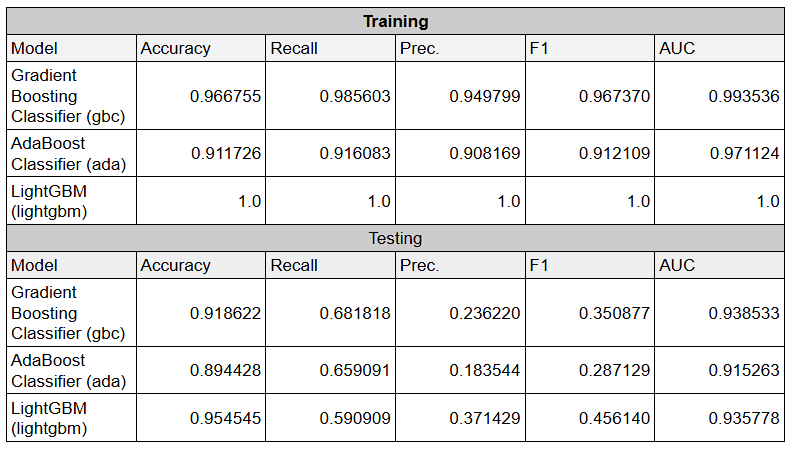

2. Hasil Evaluasi Data Scaling

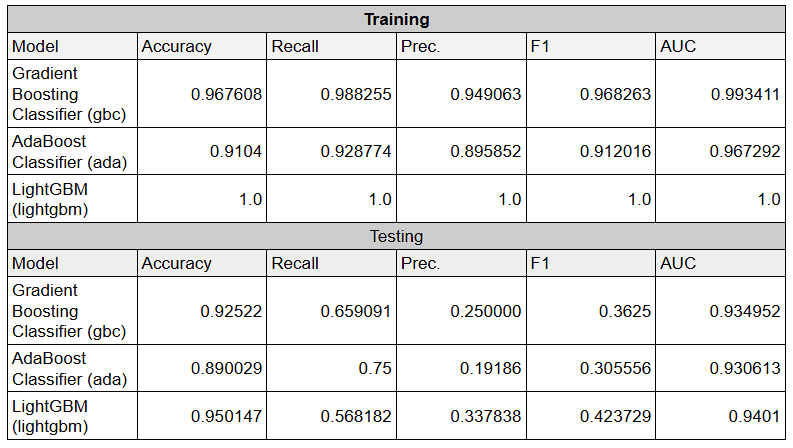

Berdasasrkan hasil di atas, data tanpa scale pada data test sedikit lebih dari di bebeerapa metrik, utamanya di sisi Recall. Adapun, model yang bisa digunakan/dipertimbangkan adalah LightGBM di data tanpa scaling karena
* F1 score paling tinggi, namun ada potensi Recall untuk ditingkatkan dengan tuning nantinya.
* Selain itu, LightGBM secara teori lebih cepat dibandingkan GradientBoost Classifier

## Feature Importance

Berdasarkan hasil evaluasi, model yang dipilih adalah LightGBM, di mana model tersebut adalah model black-box. Maka dari itu membutuhkan agnostic method

In [ ]:
!pip install -q shap lime dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# import dalex to explain complex model
import dalex as dx

# load shap package for shap explanation
import shap

# load LimeTabularExplainer for LIME method
from lime.lime_tabular import LimeTabularExplainer

In [ ]:
# initiate explainer for LightGBM Model
model_lightgbm_exp = dx.Explainer(fit_model_lightgbm_not_scaled, X_train_smote, y_train_smote, label = 'LightGBM Interpretation')

Preparation of a new explainer is initiated

  -> data              : 10558 rows 76 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 10558 values
  -> model_class       : lightgbm.sklearn.LGBMClassifier (default)
  -> label             : LightGBM Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f1a99e4b4c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000147, mean = 0.000258, max = 0.0262
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.0262, mean = 0.5, max = 1.0
  -> model_info        : package lightgbm

A new explainer has been created!


### Permutation Feature Importance

In [ ]:
# visualize permuation feature importance
model_lightgbm_exp.model_parts().plot()

### SHAP Feature Importance

In [ ]:
# my model is already fit with X_train_final and y_train_final, namely `fit_model_xgb`
explainer = shap.Explainer(fit_model_lightgbm_not_scaled)
shap_values = explainer(X_test)
shap.initjs()

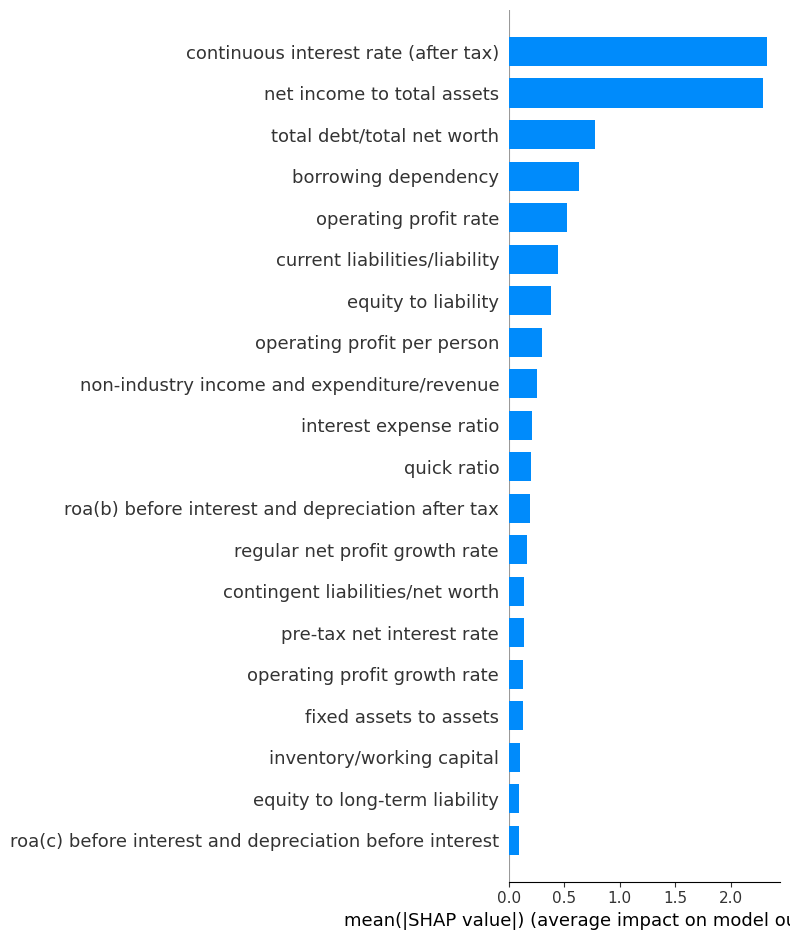

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

### Keputusan

Berdasarkan hasil di terdapat perbedaan yang menurut beberapa sumber wajar, namun harusnya tidak terlalu jauh dari sisi fitur yang penting. Fitur-fitur yang ditampilkan adalah hasil dari model dan bagaimana dampaknya terhadap metrik atau performa model. Terkadang, hasil ini tidak selalu mutlak dengan konteks bisnis atau tujuan analisi.

Oleh karena itu, hasil di atas adalah bisa menjadi acuan, namun keputusan saya akan mngkombinasikan dengan hasil eda, statistik uji, dan tujuan dari analisis.